In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
meta_df = pd.read_csv('../train_val_test_sgkf_Feb24.csv', index_col=0)
meta_df

,file,source,category,weight,file_group,fold
0,../data/interim/SONYC/audio-4/00_017389.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-4/00_017389.pkl,7
1,../data/interim/SONYC/audio-13/01_017897.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-13/01_017897.pkl,6
2,../data/interim/youtube/NatureSoundscapes/YVwx...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/YVwx7YTmRbM,0
3,../data/interim/youtube/NatureSoundscapes/kHJl...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/kHJlGDCwd9k,3
4,../data/interim/SONYC/audio-16/20_017610.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-16/20_017610.pkl,4
...,...,...,...,...,...,...
5677,../data/interim/S2L_LULC/urban_0_25/s2lam029_2...,nature_S2L_LULC,0,0.002083,../data/interim/S2L_LULC/urban_0_25/s2lam029_2...,8
5678,../data/interim/youtube/NomadicAmbience_nature...,nature_youtube/NomadicAmbience_nature,0,0.005714,youtube/NomadicAmbience_nature/B0mtZyMMhZI,2
5679,../data/interim/SONYC/audio-1/01_009080.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-1/01_009080.pkl,9
5680,../data/interim/youtube/NatureSoundscapes/xPQy...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/xPQy66ZcHdY,8


In [3]:
def load_df_pkl(filename, indices):
    import pickle
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df = output[indices]

    # close the file
    file.close()
    return df

In [5]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices'))


    
df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source','weight']]], axis=1)

df.loc[df['source'].str.contains('GoogleAudioSet'),'weight'] = df.loc[df['source'].str.contains('GoogleAudioSet'),'weight']/3


df

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,category,fold,source,weight
0,631.3,-2.384186e-11,0.01,0.274043,2.720808,73.020597,-12.256971,0.085803,0.243866,0.992357,...,3366.301954,0.785989,0.025844,1.213563,6,0.223573,1,7,city_SONYC,0.000433
1,1301.8,1.182556e-08,0.01,0.022064,2.998184,73.020597,-11.871314,0.293710,0.254938,0.986592,...,7472.690766,0.897387,0.096431,1.282266,25,1.149894,1,6,city_SONYC,0.000433
2,5627.4,-7.629394e-10,0.01,-0.103467,6.731233,73.020597,-9.489266,2.140246,0.335380,0.916662,...,65961.795949,0.991702,0.960535,1.249253,37,0.967770,0,0,nature_youtube/NatureSoundscapes,0.000479
3,2636.1,-1.093000e-09,0.01,-0.012926,3.048206,73.020601,-10.347482,0.311354,0.303827,0.991792,...,29200.967305,0.989678,0.340410,1.214798,0,0.000000,0,3,nature_youtube/NatureSoundscapes,0.000479
4,840.4,-7.390976e-10,0.01,0.018690,8.794522,73.020597,-15.392054,3.380374,0.169980,0.878800,...,4277.519625,0.885569,0.205068,1.521280,45,13.050769,1,4,city_SONYC,0.000433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,3264.9,-2.831221e-11,0.01,-0.048890,56.696478,73.020597,-19.260380,10.619979,0.108889,0.642202,...,28208.160654,0.985118,0.350674,2.020270,10,1.480230,0,8,nature_S2L_LULC,0.002083
5678,5860.2,5.275011e-10,0.01,-0.003535,3.532186,73.020601,-9.771369,0.558483,0.324662,0.978212,...,66344.352405,0.996981,0.754502,1.210810,3,0.011304,0,2,nature_youtube/NomadicAmbience_nature,0.005714
5679,424.8,1.032352e-08,0.01,-0.021892,3.870763,73.020601,-13.954796,0.976864,0.200567,0.965084,...,1557.483228,0.850425,0.007545,1.240776,39,1.220232,1,9,city_SONYC,0.000433
5680,2137.9,-1.326203e-09,0.01,-0.013038,3.025539,73.020601,-10.525074,0.222108,0.297678,0.992424,...,22251.094871,0.984097,0.240088,1.201302,2,0.006908,0,8,nature_youtube/NatureSoundscapes,0.000479


In [6]:
## data preprocessing
def df_preproc(df):

    # replacing the inf values by NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    train_category = df[df['fold']<8]['category']
    val_category = df[df['fold']==8]['category']
    test_category = df[df['fold']==9]['category']

    train_source = df[df['fold']<8]['source']
    val_source = df[df['fold']==8]['source']
    test_source = df[df['fold']==9]['source']
    
    train_weight = df[df['fold']<8]['weight']
    val_weight = df[df['fold']==8]['weight']
    test_weight = df[df['fold']==9]['weight']

    train_df = df[df['fold']<8].drop(columns=['fold','category','source','weight'])
    val_df = df[df['fold']==8].drop(columns=['fold','category','source','weight'])
    test_df = df[df['fold']==9].drop(columns=['fold','category','source','weight'])

    # replace the nan by mean
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
          ,('scaler', StandardScaler())
    ])

    transformer.fit(train_df)
    train_df = pd.DataFrame(transformer.transform(train_df), columns=train_df.columns)
    val_df = pd.DataFrame(transformer.transform(val_df), columns=val_df.columns)
    test_df = pd.DataFrame(transformer.transform(test_df), columns=test_df.columns)
    
    return train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight


In [7]:
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

In [8]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


2023-02-24 11:31:29.743915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


2023-02-24 11:31:33.960974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback,
                    sample_weight=train_weight)

Epoch 1/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0010 - accuracy: 0.6958 - val_loss: 0.4725 - val_accuracy: 0.8025
Epoch 2/20
143/143 [==============================] - 0s 2ms/step - loss: 8.2078e-04 - accuracy: 0.7763 - val_loss: 0.4184 - val_accuracy: 0.8594
Epoch 3/20
143/143 [==============================] - 0s 2ms/step - loss: 7.7211e-04 - accuracy: 0.8132 - val_loss: 0.4084 - val_accuracy: 0.8505
Epoch 4/20
143/143 [==============================] - 0s 2ms/step - loss: 7.2883e-04 - accuracy: 0.8297 - val_loss: 0.3800 - val_accuracy: 0.8683
Epoch 5/20
143/143 [==============================] - 0s 1ms/step - loss: 7.5926e-04 - accuracy: 0.8196 - val_loss: 0.3928 - val_accuracy: 0.8505
Epoch 6/20
143/143 [==============================] - 0s 1ms/step - loss: 7.0262e-04 - accuracy: 0.8288 - val_loss: 0.3528 - val_accuracy: 0.8808
Epoch 7/20
143/143 [==============================] - 0s 2ms/step - loss: 7.3356e-04 - accuracy: 0.8371 - val_loss: 0.3598 - val

In [10]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

18/18 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8741
Loss:  0.3488501012325287
Accuracy:  0.8741135001182556


In [11]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

18/18 [==============================] - 0s 1ms/step


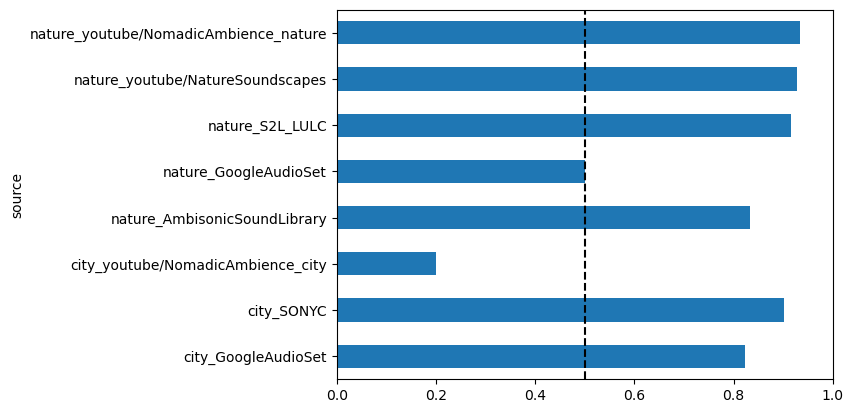

In [12]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Background indices

In [13]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_bg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source','weight']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

In [14]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback)

Epoch 1/20
143/143 [==============================] - 1s 2ms/step - loss: 0.4554 - accuracy: 0.8062 - val_loss: 0.3015 - val_accuracy: 0.9057
Epoch 2/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8644 - val_loss: 0.2723 - val_accuracy: 0.9039
Epoch 3/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8637 - val_loss: 0.2631 - val_accuracy: 0.9110
Epoch 4/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8745 - val_loss: 0.2477 - val_accuracy: 0.9128
Epoch 5/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8758 - val_loss: 0.2491 - val_accuracy: 0.9146
Epoch 6/20
143/143 [==============================] - 0s 1ms/step - loss: 0.2953 - accuracy: 0.8799 - val_loss: 0.2324 - val_accuracy: 0.9146
Epoch 7/20
143/143 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8813 - val_loss: 0.2367 - val_accuracy: 0.9146
Epoch 

In [16]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

18/18 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8865
Loss:  0.28295978903770447
Accuracy:  0.8865247964859009


In [17]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

18/18 [==============================] - 0s 1ms/step


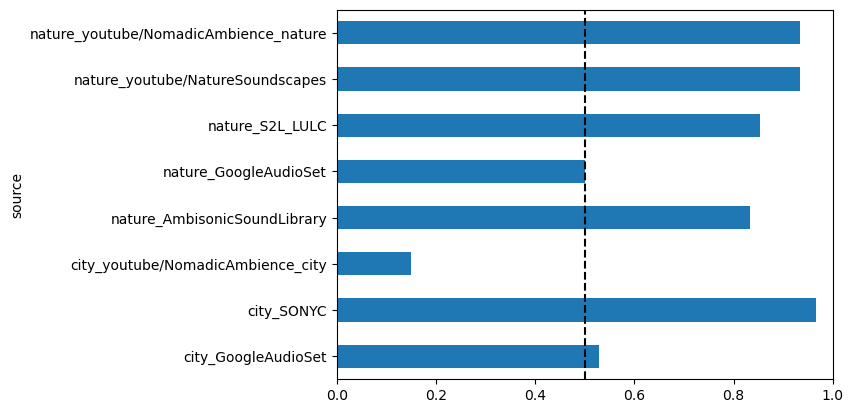

In [18]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Foreground indices

In [ ]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_fg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source = df_preproc(df)

In [ ]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback)

In [ ]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

In [ ]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()